In [1]:
from pathlib import Path

import h5py
import sys 
sys.path.append('../')

from source.helper import to_dB, print_spectogram, gen_spectogram, diff_frames, \
                          get_argmaxed_spectrogram, get_tresholded_spectogram, get_spectrogram_metrics, plot_metrics

In [4]:
BASE_DIR = Path("D:/SIIUM/3 semestr/RADAR/radar-project/data")  # change to your project dir

loaded_file = h5py.File(BASE_DIR / 'complete_dataset.h5', 'r') # best to make yourself a h5 file containing complete dataset

In [5]:
data_keys = loaded_file['2023_03_21'].keys()

background


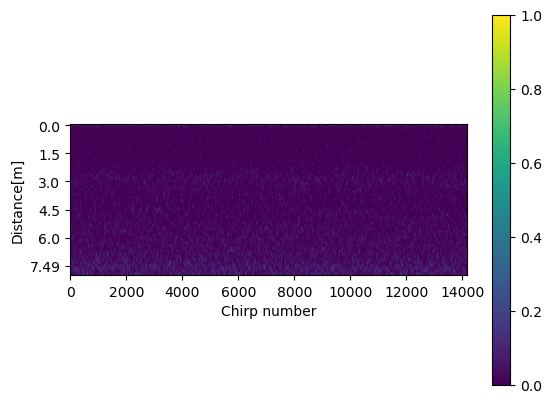

bartek_sciana


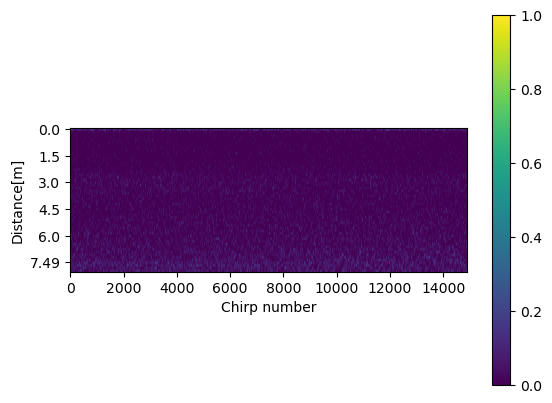

biegunko_1os_2m_rafal


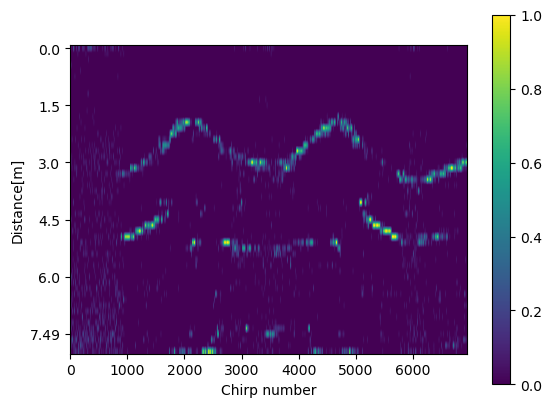

chodzonko_1os_2m_bartek


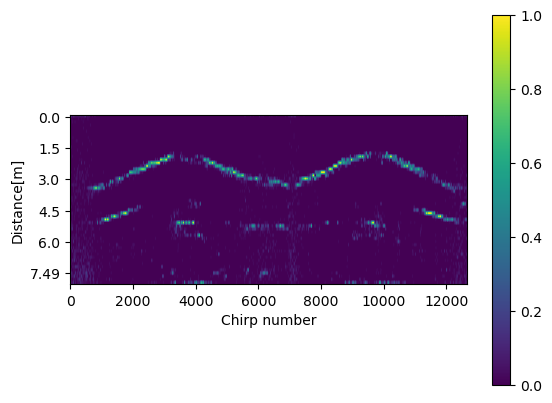

chodzonko_1os_4-1-8m_bartek


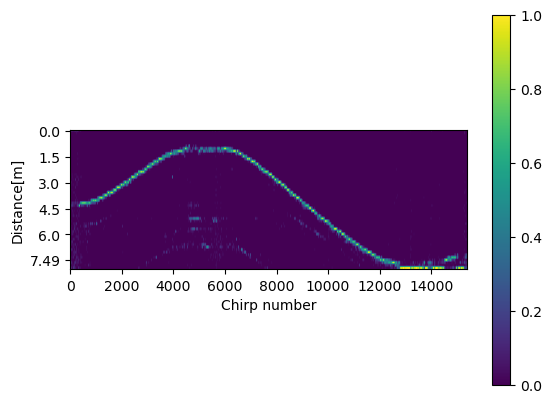

chodzonko_2os_2m_bartek_3m_oskar


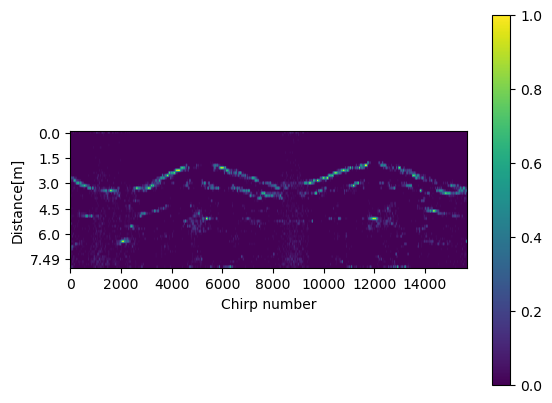

chodzonko_2os_2m_oskar_3m_bartek


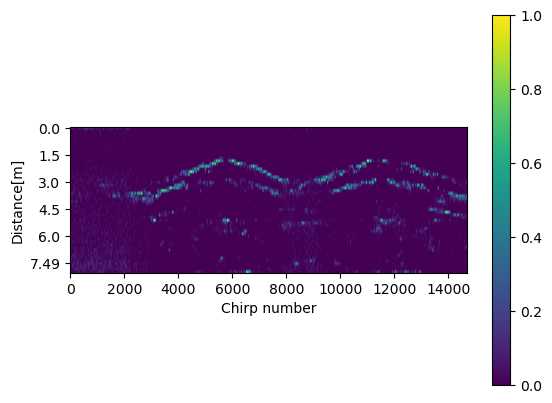

odleglosc_1m_bartek_bokiem


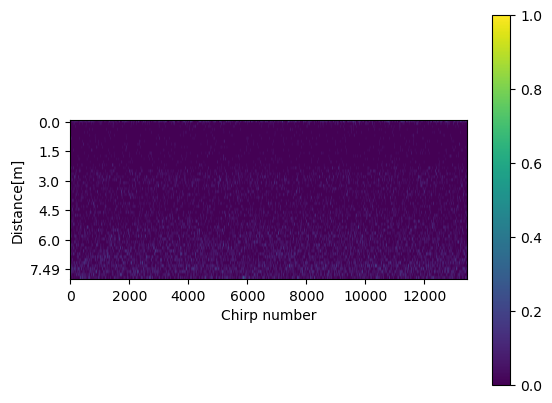

odleglosc_1m_bartek_przodem


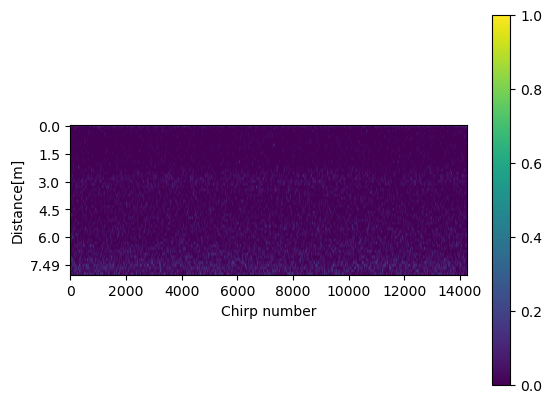

odleglosc_2m_bartek_bokiem


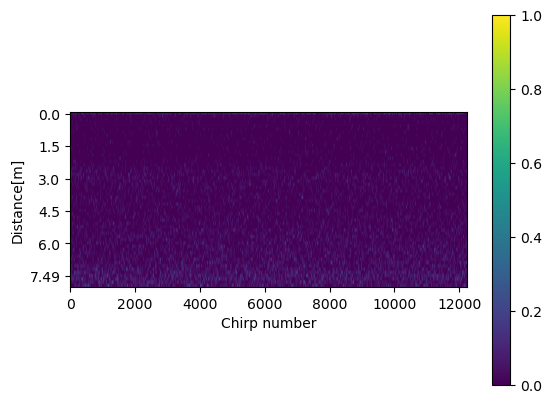

odleglosc_2m_bartek_przodem


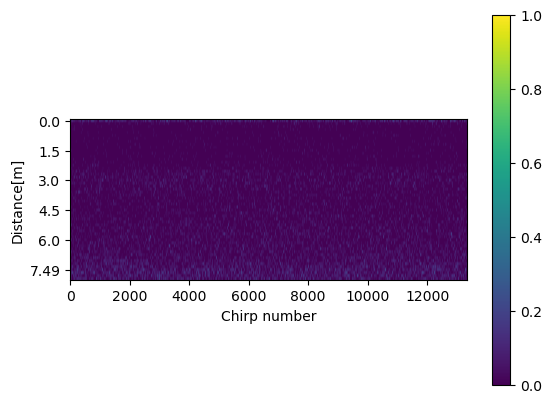

odleglosc_3m_bartek_bokiem


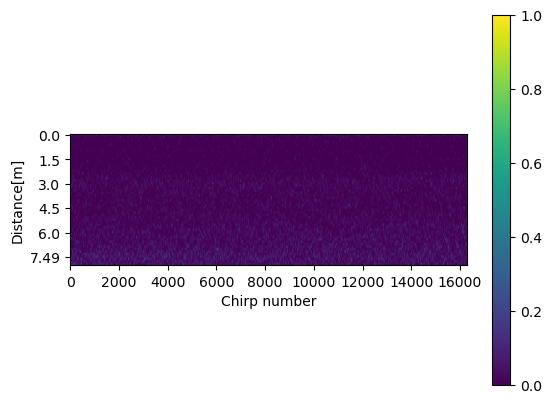

odleglosc_3m_bartek_przodem


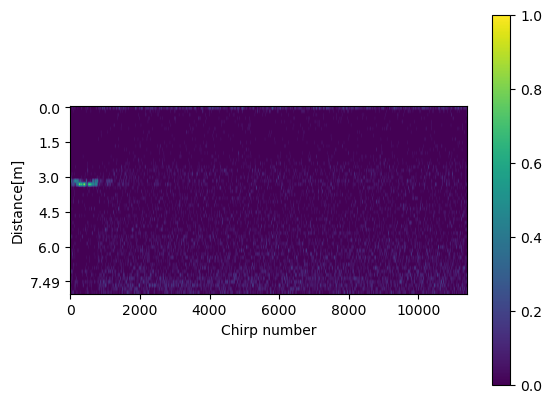

odleglosc_4m_bartek_bokiem


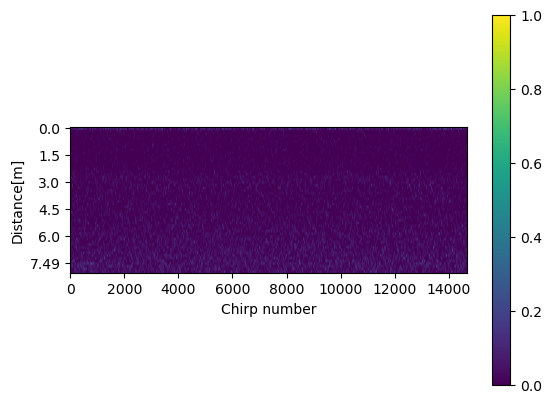

odleglosc_4m_bartek_przodem


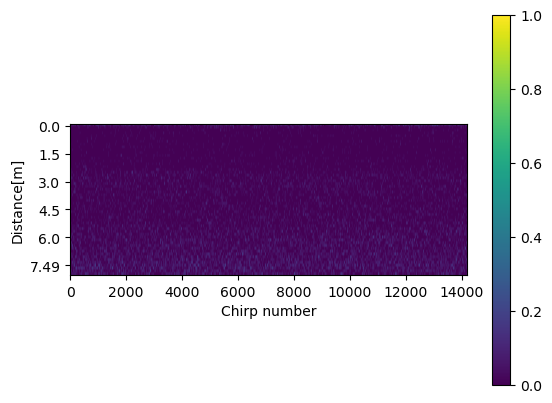

randomowe_chodzonko_1os_bartek


d:\SIIUM\3 semestr\RADAR\radar-project\notebooks\..\source\helper.py:35: RuntimeWarning: divide by zero encountered in log
  return 20 * np.log(np.abs(spectogram))


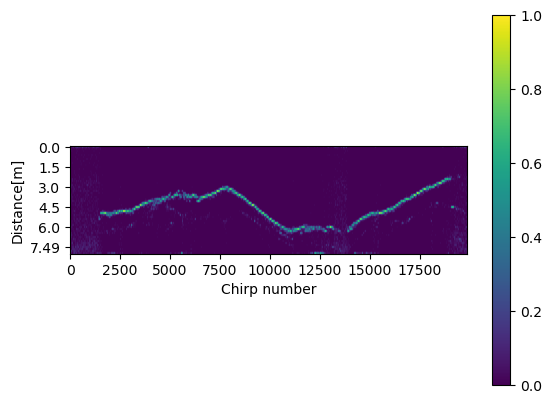

randomowe_chodzonko_3os


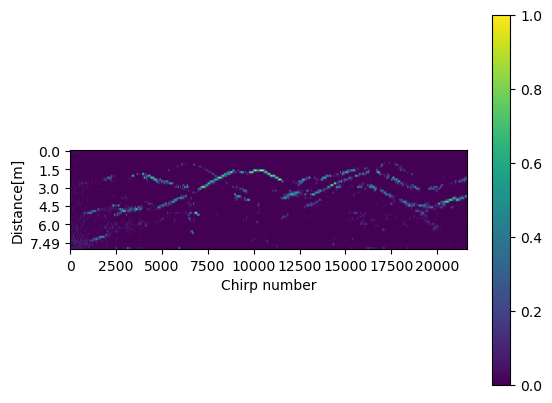

wiatrak_1m


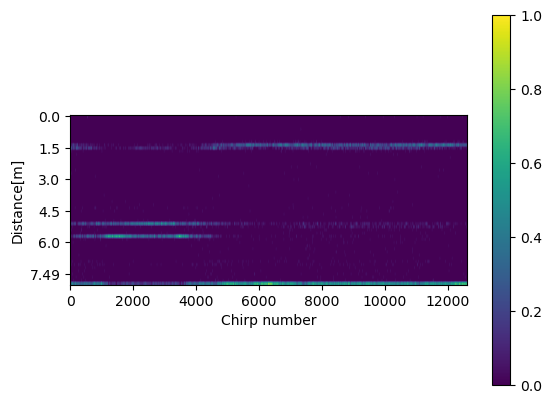

wiatrak_2m


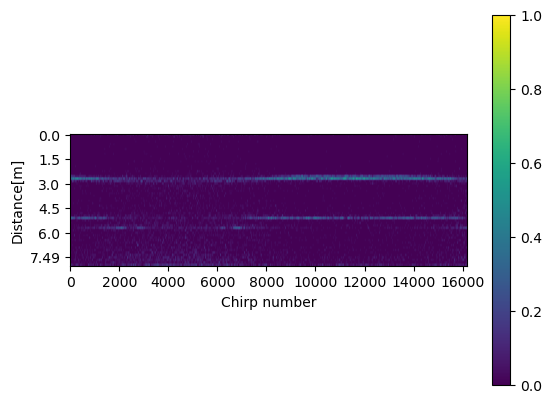

wiatrak_2m_bartek_sciana


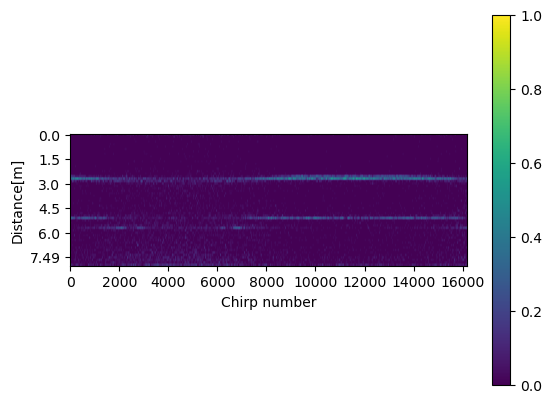

wiatrak_3m


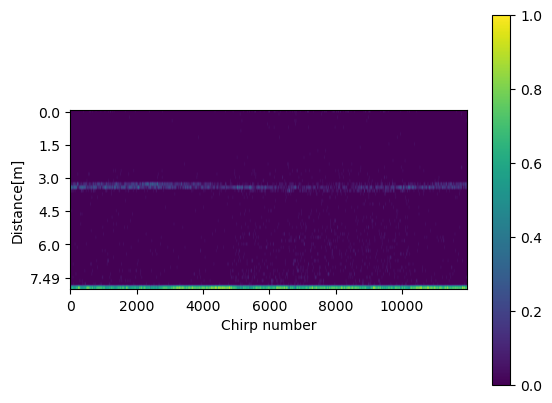

wiatrak_4m


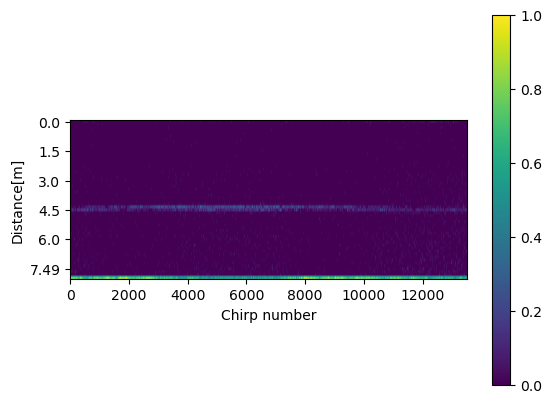

wysoki_niski_3m_oskar_bartek_przodem


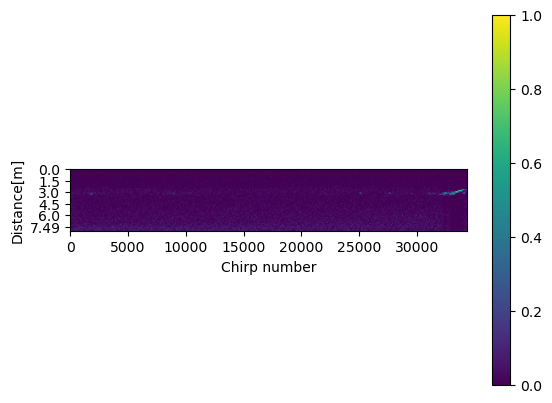

In [6]:
for k in list(data_keys):
    print(k)
    sample_file = loaded_file['2023_03_21'][k]
    sample_file = sample_file[:, 0, 0, :]
    frames_diff = diff_frames(sample_file, 1)  #odejmujemy ostatnią klatkę
    diff_spect, y = gen_spectogram(frames_diff, depth_limit=8)
    diff_spectdb = to_dB(diff_spect)
    argmax_spectrogram = get_argmaxed_spectrogram(diff_spectdb) # this returns spectrogram with 1 at argmax, else 0
    print_spectogram(argmax_spectrogram, y)